In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [ ]:
df.sample(n=5)

In [3]:
df = df.drop("neighborhoodCrimeStatisticsID", axis=1)

In [ ]:
df.neighborhood.unique()

In [5]:
df = df.loc[df["neighborhood"] != "Z_** NOT ASSIGNED **"]
df = df.loc[df["neighborhood"] != "** NOT ASSIGNED **"]

# df.neighborhood.value_counts()

In [6]:
df["neighborhood"] = df["neighborhood"].replace("CARAG", "South Uptown")
df["neighborhood"] = df["neighborhood"].replace("ECCO", "East Bde Maka Ska")
df["neighborhood"] = df["neighborhood"].replace("WEST CALHOUN", "West Maka Ska")

df["neighborhood"] = df.neighborhood.str.lower()

# df.neighborhood.value_counts()

In [7]:
df["neighborhood"] = df["neighborhood"].replace("stevens square - loring heights", "steven's square - loring heights")

df["neighborhood"] = df["neighborhood"].replace("west calhoun", "west maka ska")

df.sort_values(by="neighborhood")["neighborhood"].unique()

# 480 data points for each neighborhood, accounting for name changes!

array(['armatage', 'audubon park', 'bancroft', 'beltrami', 'bottineau',
       'bryant', 'bryn - mawr', 'camden industrial',
       'cedar - isles - dean', 'cedar riverside', 'central', 'cleveland',
       'columbia park', 'como', 'cooper', 'corcoran', 'diamond lake',
       'downtown east', 'downtown west', 'east bde maka ska',
       'east harriet', 'east isles', 'east phillips', 'elliot park',
       'ericsson', 'field', 'folwell', 'fulton', 'hale', 'harrison',
       'hawthorne', 'hiawatha', 'holland', 'howe',
       'humboldt industrial area', 'jordan', 'keewaydin', 'kenny',
       'kenwood', 'king field', 'lind - bohanon', 'linden hills',
       'logan park', 'longfellow', 'loring park', 'lowry hill',
       'lowry hill east', 'lyndale', 'lynnhurst', 'marcy holmes',
       'marshall terrace', 'mckinley', 'mid - city industrial',
       'midtown phillips', 'minnehaha', 'morris park', 'near - north',
       'nicollet island - east bank', 'north loop', 'northeast park',
       'nort

In [8]:
df.neighborhood.nunique()

87

In [9]:
CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]

CAMDEN = ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", "shingle creek", "victory", "webber - camden"]

CENTRAL = ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]

LONGFELLOW = ["cooper", "hiawatha", "howe", "longfellow", "seward"]

NEAR_NORTH = ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]

NOKOMIS = ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
           "northrop", "page", "regina", "wenonah"]

NORTHEAST = ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
             "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]

PHILLIPS = ["east phillips", "midtown phillips", "phillips west", "ventura village"]

POWDERHORN = ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]

SOUTHWEST = ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", "windom"]

UNIVERSITY = ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", "prospect park - east river road", "university of minnesota"]

COMMUNITIES = [CALHOUN_ISLES, CAMDEN, CENTRAL, LONGFELLOW, NEAR_NORTH, NOKOMIS, NORTHEAST, \
              PHILLIPS, POWDERHORN, SOUTHWEST, UNIVERSITY]

In [10]:
df.ucrDescription.unique()

array(['Aggravated Assault', 'Arson', 'Auto Theft', 'Burglary',
       'Homicide', 'Larceny', 'Rape', 'Robbery'], dtype=object)

In [11]:
violent_crimes = ["Aggravated Assault", "Homicide", "Rape", "Robbery"]

property_crimes = ["Arson", "Auto Theft", "Burglary", "Larceny"]

# As per FBI ucr reporting standards

In [12]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]

before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])

before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]

before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])

In [13]:
before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)

In [14]:
after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

In [15]:
before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)

In [16]:
after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

In [ ]:
# Now have the 4 principal dfs I will use for all further work:

# 1. before_property
# 2. after_property

# 3. before_violent
# 4. after_violent

# I will split these into df by Mpls COMMUNITY, then run aggs and return series for plotting!

# CALHOUN_ISLES, CAMDEN, CENTRAL, LONGFELLOW, NEAR_NORTH, NOKOMIS, NORTHEAST, \
#               PHILLIPS, POWDERHORN, SOUTHWEST, UNIVERSITY

# Naming scheme:
    
# CALH = CALHOUN_ISLES
# CAMD = CAMDEN
# etc.

<AxesSubplot:ylabel='neighborhood'>

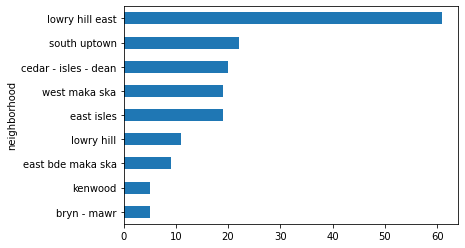

In [37]:
bp_CALHOUN_ISLES = before_property.loc[  (before_property["neighborhood"].isin(CALHOUN_ISLES))  ]

bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.sort_values(by="neighborhood")

final_bp_CALHOUN_ISLES = bp_CALHOUN_ISLES.groupby("neighborhood")["number"].sum()
final_bp_CALHOUN_ISLES = final_bp_CALHOUN_ISLES.sort_values()

total_beforepropertycrime_CALHOUN_ISLES = final_bp_CALHOUN_ISLES.sum()

final_bp_CALHOUN_ISLES.plot(kind="barh")

In [26]:
ap_CALHOUN_ISLES = after_property.loc[  (after_property["neighborhood"].isin(CALHOUN_ISLES))  ]

ap_CALHOUN_ISLES

# bv_CALHOUN_ISLES
# av_CALHOUN_ISLES

,neighborhood,ucrDescription,number
23281,bryn - mawr,Arson,0.0
23282,bryn - mawr,Auto Theft,1.0
23283,bryn - mawr,Burglary,3.0
23285,bryn - mawr,Larceny,1.0
23305,cedar - isles - dean,Arson,0.0
23306,cedar - isles - dean,Auto Theft,3.0
23307,cedar - isles - dean,Burglary,5.0
23309,cedar - isles - dean,Larceny,12.0
23393,east bde maka ska,Arson,0.0
23394,east bde maka ska,Auto Theft,1.0


In [ ]:
bp_CAMDEN
ap_CAMDEN
bv_CAMDEN
av_CAMDEN

In [ ]:
bp_CENTRAL
ap_CENTRAL
bv_CENTRAL
av_CENTRAL

In [ ]:
bp_LONGFELLOW
ap_LONGFELLOW
bv_LONGFELLOW
av_LONGFELLOW

In [ ]:
bp_NEAR_NORTH
ap_NEAR_NORTH
bv_NEAR_NORTH
av_NEAR_NORTH

In [ ]:
bp_NOKOMIS
ap_NOKOMIS
bv_NOKOMIS
av_NOKOMIS

In [ ]:
bp_NORTHEAST
ap_NORTHEAST
bv_NORTHEAST
av_NORTHEAST

In [ ]:
bp_PHILLIPS
ap_PHILLIPS
bv_PHILLIPS
av_PHILLIPS

In [ ]:
bp_POWDERHORN
ap_POWDERHORN
bv_POWDERHORN
av_POWDERHORN

In [ ]:
bp_SOUTHWEST
ap_SOUTHWEST
bv_SOUTHWEST
av_SOUTHWEST

In [ ]:
bp_UNIVERSITY
ap_UNIVERSITY
bv_UNIVERSITY
av_UNIVERSITY

In [21]:
def run_agg(a_df):
    """ Return Series """
    return a_df.groupby(["neighborhood", "ucrDescription"])["number"].sum()      

In [24]:
run_agg(before_property)

neighborhood                      ucrDescription
armatage                          Arson              0.0
                                  Auto Theft         0.0
                                  Burglary           6.0
                                  Larceny            2.0
audubon park                      Arson              0.0
                                  Auto Theft         0.0
                                  Burglary           0.0
                                  Larceny            6.0
bancroft                          Arson              0.0
                                  Auto Theft         6.0
                                  Burglary           2.0
                                  Larceny            7.0
beltrami                          Arson              0.0
                                  Auto Theft         2.0
                                  Burglary           0.0
                                  Larceny            1.0
bottineau                         Arson

In [ ]:
before_grp = before.groupby(["neighborhood", "ucrDescription"])
after_grp = after.groupby(["neighborhood", "ucrDescription"])

In [ ]:
before_agg = before_grp["number"].sum()
after_agg = after_grp["number"].sum()

In [ ]:
before_agg[:24].unstack().plot.bar()

In [ ]:
after_agg[:24].unstack().plot.bar()

In [ ]:
before_property.sort_values(by=["neighborhood", "ucrDescription"])
after_property.sort_values(by=["neighborhood", "ucrDescription"])

before_violent.sort_values(by=["neighborhood", "ucrDescription"])
after_violent.sort_values(by=["neighborhood", "ucrDescription"])

In [ ]:
before_property_grp = before.groupby(["neighborhood", "ucrDescription"])
after_property_grp = after.groupby(["neighborhood", "ucrDescription"])

before_violent_grp = before.groupby(["neighborhood", "ucrDescription"])
after_violent_grp = after.groupby(["neighborhood", "ucrDescription"])

In [ ]:
before_property_agg = before_grp["number"].sum()
after_property_agg = after_grp["number"].sum()

before_violent_agg = before_grp["number"].sum()
after_violent_agg = after_grp["number"].sum()

In [ ]:
after_violent_agg.head(10)

In [ ]:
before_violent_agg.head(10)

In [ ]:
after_violent_agg[:24].unstack().plot.bar()

In [ ]:
before_violent_agg[:24].unstack().plot.bar()

In [ ]:
MPLS_CITIES = CALHOUN_ISLES + CAMDEN + CENTRAL + LONGFELLOW + NEAR_NORTH + NOKOMIS + NORTHEAST + \
              PHILLIPS + POWDERHORN + SOUTHWEST + UNIVERSITY
df_cities = df.neighborhood.unique()

In [ ]:
for c in sorted(MPLS_CITIES):
    if c in df_cities:
        pass
    else:
        print(c)

In [ ]:
sorted(MPLS_CITIES) == sorted(df_cities)

In [ ]:
len(MPLS_CITIES)

In [ ]:
len(df_cities)

In [ ]:
print(sorted(MPLS_CITIES))

In [ ]:
print(sorted(df_cities))

In [ ]:
oddballs = [x for x in (MPLS_CITIES + df_cities.tolist()) if x not in MPLS_CITIES or x not in df_cities]
print(oddballs)

In [ ]:
master_city_list = sorted(MPLS_CITIES)

In [ ]:
master_city_list == sorted(df_cities)

In [ ]:
master_city_dict = {}

In [ ]:
master_city_dict["CALHOUN_ISLES"] = CALHOUN_ISLES
master_city_dict["CAMDEN"] = CAMDEN
master_city_dict["CENTRAL"] = CENTRAL
master_city_dict["LONGFELLOW"] = LONGFELLOW
master_city_dict["NEAR_NORTH"] = NEAR_NORTH
master_city_dict["NOKOMIS"] = NOKOMIS
master_city_dict["NORTHEAST"] = NORTHEAST
master_city_dict["PHILLIPS"] = PHILLIPS
master_city_dict["POWDERHORN"] = POWDERHORN
master_city_dict["SOUTHWEST"] = SOUTHWEST
master_city_dict["UNIVERSITY"] = UNIVERSITY

In [ ]:
print(master_city_dict)

In [ ]:
before_property_agg

In [ ]:
after_property_agg

In [ ]:
before_violent_agg 

In [ ]:
after_violent_agg 